In [138]:
import csv
import psycopg2
conn = psycopg2.connect('postgresql://brosra01:@localhost/world')
cur = conn.cursor()
cur.execute('select * from country limit 10')
res = cur.fetchall()
for row in res[:1]:
    print(row)

('AFG', 'Afghanistan', 'Asia', 'Southern and Central Asia', 652090.0, 1919, 22720000, 45.9, Decimal('5976.00'), None, 'Afganistan/Afqanestan', 'Islamic Emirate', 'Mohammad Omar', 1, 'AF')


In [139]:
import csv
import psycopg2
conn = psycopg2.connect('postgresql://brosra01:@localhost/world')
cur = conn.cursor()
x = 'USA'
cur.execute("select code, name, region, continent from country where code = '%s'" % x)
res = cur.fetchall()
for row in res[:1]:
    print(row)

('USA', 'United States', 'North America', 'North America')


In [140]:
import csv
import psycopg2

with open('/home/faculty/millbr02/pub/un-general-debates.csv','r',encoding='latin-1') as data:
    csv_iter = csv.reader(data)
    db =[]
    for row in csv_iter:
        db.append(row)
db[:1]

[['session', 'year', 'country', 'text']]

In [141]:
import csv
import psycopg2
with open('/home/faculty/millbr02/pub/un-general-debates.csv','r',encoding='latin-1') as data:
    csv_iter = csv.reader(data)
    db = []
    for row in csv_iter:
        db.append(row)
        
unknown_country = []
other_countries = {'CSK': ['Czechoslovakia', 'Europe', 'Eastern Europe'],
                   'DDR': ['East Germany', 'Europe', 'Western Europe'],
                   'EU': ['European Union', 'Europe', 'Western Europe'],
                   'MNE': ['Montenegro', 'Europe', 'Eastern Europe'],
                   'ROU': ['Romania', 'Europe', 'Eastern Europe'],
                   'SSD': ['South Sudan', 'Africa', 'Northern Africa'],
                   'TLS': ['East Timor', 'Asia', 'Southeast Asia'],
                   'YDYE': ['Democratic Yemen', 'Asia', 'Middle East']}

for row in db[1:]:
    cur.execute("select code, name, region, continent from country where code = %s", [row[2]])
    country = cur.fetchone()
    if country:
        row.append(country[1])
        row.append(country[2])
        row.append(country[3])
        
    else:
        #print("No Entry for {}".format(row[2]))
        unknown_country.append(row[2])
        row.append(other_countries[row[2]][0])
        row.append(other_countries[row[2]][2])
        row.append(other_countries[row[2]][1])

In [142]:
years = {}
for row in db[1:]:
    yr = row[1]
    country = row[2]
    if country not in unknown_country:
        region = row[5]
        if yr not in years:
            years[yr] = {}
        if region not in years[yr]:
            years[yr][region] = 1
        else:
            years[yr][region] += 1

In [143]:
for yr in sorted(years):
    for region in sorted(years[yr]):
        print(yr, region, years[yr][region])


1970 Australia and New Zealand 2
1970 British Islands 1
1970 Caribbean 4
1970 Central Africa 2
1970 Central America 5
1970 Eastern Africa 5
1970 Eastern Asia 1
1970 Eastern Europe 2
1970 Middle East 6
1970 Nordic Countries 2
1970 North America 2
1970 Northern Africa 5
1970 South America 9
1970 Southeast Asia 6
1970 Southern Africa 1
1970 Southern Europe 3
1970 Southern and Central Asia 4
1970 Western Africa 6
1970 Western Europe 4
1971 Australia and New Zealand 2
1971 British Islands 2
1971 Caribbean 5
1971 Central Africa 6
1971 Central America 5
1971 Eastern Africa 10
1971 Eastern Asia 3
1971 Eastern Europe 6
1971 Melanesia 1
1971 Middle East 11
1971 Nordic Countries 4
1971 North America 2
1971 Northern Africa 6
1971 South America 11
1971 Southeast Asia 8
1971 Southern Africa 1
1971 Southern Europe 6
1971 Southern and Central Asia 6
1971 Western Africa 13
1971 Western Europe 5
1972 Australia and New Zealand 2
1972 British Islands 2
1972 Caribbean 5
1972 Central Africa 6
1972 Central A

2006 South America 12
2006 Southeast Asia 10
2006 Southern Africa 5
2006 Southern Europe 14
2006 Southern and Central Asia 14
2006 Western Africa 16
2006 Western Europe 9
2007 Australia and New Zealand 2
2007 Baltic Countries 3
2007 British Islands 2
2007 Caribbean 13
2007 Central Africa 9
2007 Central America 8
2007 Eastern Africa 16
2007 Eastern Asia 5
2007 Eastern Europe 9
2007 Melanesia 4
2007 Micronesia 5
2007 Middle East 17
2007 Nordic Countries 5
2007 North America 2
2007 Northern Africa 6
2007 Polynesia 3
2007 South America 12
2007 Southeast Asia 10
2007 Southern Africa 5
2007 Southern Europe 14
2007 Southern and Central Asia 14
2007 Western Africa 15
2007 Western Europe 9
2008 Australia and New Zealand 2
2008 Baltic Countries 3
2008 British Islands 2
2008 Caribbean 13
2008 Central Africa 9
2008 Central America 8
2008 Eastern Africa 16
2008 Eastern Asia 5
2008 Eastern Europe 9
2008 Melanesia 4
2008 Micronesia 5
2008 Middle East 17
2008 Nordic Countries 5
2008 North America 2
20

In [223]:
countryname = []
for row in range(len(res)):
    countryname.append( res[row][0]) 
Countryname = []
for item in countryname:
    if item not in Countryname:
        Countryname.append(item)
Countryname       

['USA']

In [224]:
with open('/home/faculty/millbr02/pub/un-debates-augmented-1.csv','r',encoding='latin-1') as data:
    csv_iter = csv.reader(data)
    db = []
    for row in csv_iter:
        db.append(row)
        
    Country = {}
    for line in db[1:]:
        Country[line[4]] = 0
        
    Matrix_A= {}
    for row in db[1:]:
        nation_speach = row[4]
        data = row[3]
        if nation_speach  not in Matrix_A:
            Matrix_A[nation_speach ] = Country.copy()
            
        for key in Matrix_A:
            counter = data.count(key)
            Matrix_A[nation_speach][key] += counter

In [225]:
%matplotlib inline
import networkx as nx
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [226]:
g = nx.Graph()


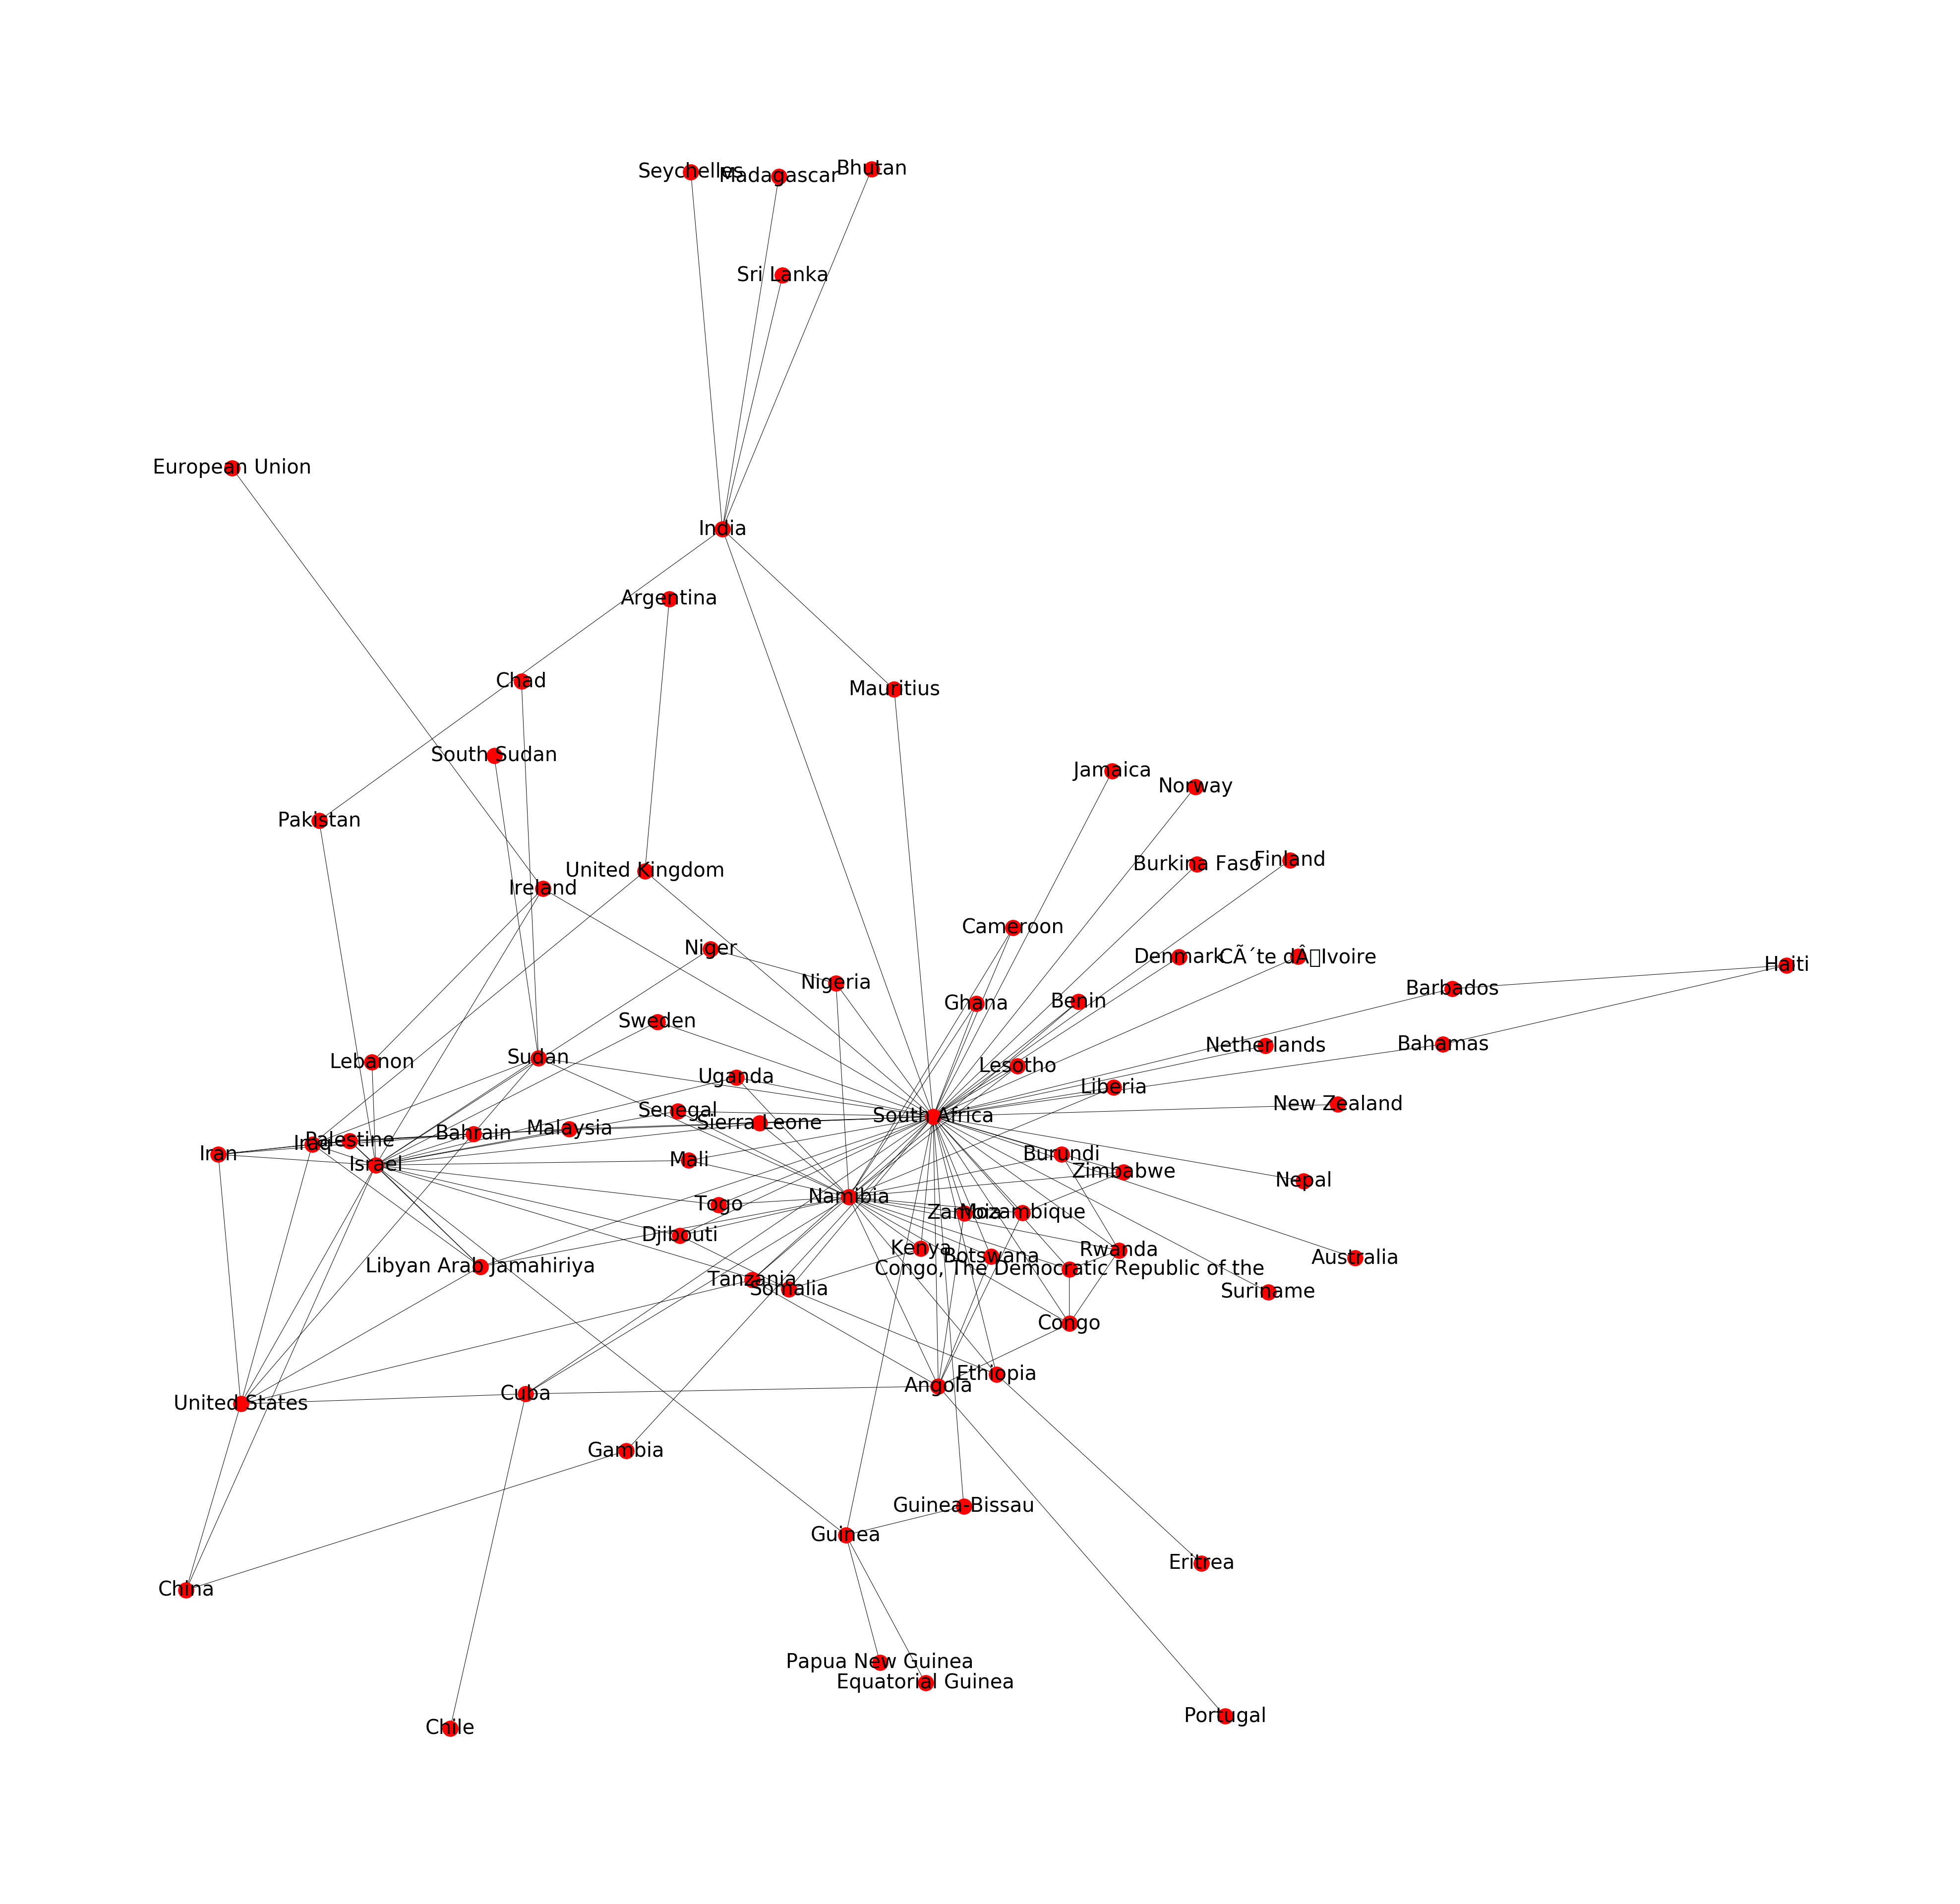

In [227]:
g.add_nodes_from(Matrix_A) 
for country in Matrix_A: 
    for country2 in Matrix_A[key]: 
        if Matrix_A[country][country2] > 80:
            g.add_edge(country, country2, weight=Matrix_A[country][country2])
gfig, gax = plt.subplots(figsize = (70,70))
hego = nx.ego_graph(g,'South Africa', radius =2)
pos = nx.spring_layout(g, k=.3, iterations=1000, scale=10, center=(0,0))
nx.draw(hego, pos, ax=gax, node_size=1000, with_labels=True, font_size=40)
